I'll start by testing my model on a series of toy datasets. They'll be generated initially to be linearly separable but can have noise as well.

In [232]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models import SupportVectorMachine
from utils.data_utils import split_dataset

In [233]:
# to construct the dataset
def get_toy_svm_dataset_binary(num_samples=100, num_features=2, noise=0, w=None, b=None):
    X = (np.random.rand(num_samples, num_features) - 0.5) * 3
    if w is None:
      w = np.random.rand(num_features) - 0.5
    if b is None:
      b = np.random.rand() - 0.5
    y = ((X @ w) + b > 0).astype(int)
    y[y==0] = -1

    if noise != 0:
        y_idx = np.arange(0, len(y))

        num_y_to_flip = int(noise * len(y))
        
        y_idx_to_flip = np.random.choice(y_idx, size=num_y_to_flip, replace=False)
        
        y[y_idx_to_flip] = y[y_idx_to_flip] * -1
    return X, y, w, b

In [234]:
# create toy dataset
num_samples = 100
num_features = 2
noise = 0

X, y, w, b = get_toy_svm_dataset_binary(num_samples, num_features, noise)

In [235]:
# for plotting a 2D decision surface
def get_decision_boundary_points_2D(X, w, b):
    assert w.shape == (2,), "must have two weights"
    assert X.shape[1] == 2, "X must have two features"

    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y = (- ((x * w[0]) + b)) / w[1]
    return x, y

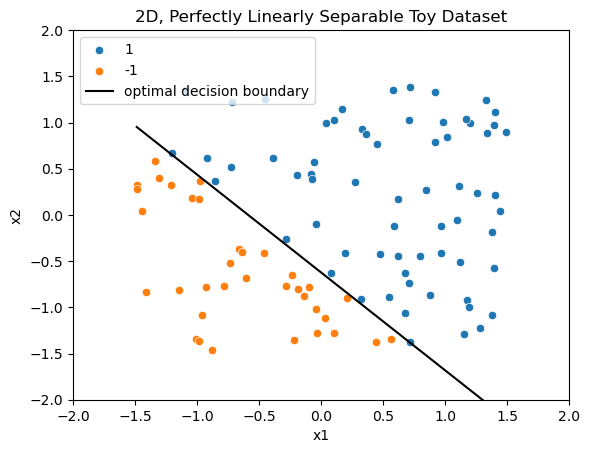

In [236]:
# plot dataset and theoretical best decision surface

sns.scatterplot(x=X[y==1, 0], y=X[y==1, 1])
sns.scatterplot(x=X[y==-1, 0], y=X[y==-1, 1])
plt.plot(*get_decision_boundary_points_2D(X, w, b), c='black')

plt.title('2D, Perfectly Linearly Separable Toy Dataset')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend(['1', '-1', 'optimal decision boundary'])

In [237]:
# fit model to data 
model = SupportVectorMachine(task='classification')

model.fit(X, y)

print(f'Accuracy over entire dataset: {model.accuracy(X, y)}')

Accuracy over entire dataset: 0.95


In the above case, I'm fitting to the full dataset for visualization purposes. However, in future models, I'll split into a train and test dataset to look for overfitting.

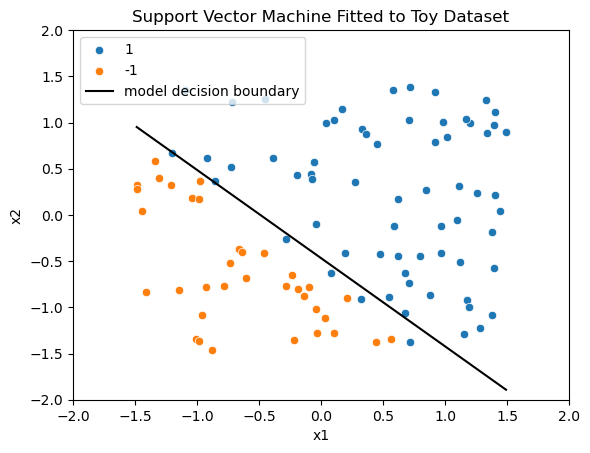

In [238]:
sns.scatterplot(x=X[y==1, 0], y=X[y==1, 1])
sns.scatterplot(x=X[y==-1, 0], y=X[y==-1, 1])
plt.plot(*get_decision_boundary_points_2D(X, model.w, model.b), c='black')

plt.title('Support Vector Machine Fitted to Toy Dataset')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend(['1', '-1', 'model decision boundary'])

# 500 Samples, 25 features, 5 % noise

In [239]:
num_samples = 500
num_features = 25
noise = 0.05

X, y, _, _ = get_toy_svm_dataset_binary(num_samples, num_features, noise)

test_size = 0.2

X_train, y_train, X_test, y_test = split_dataset(X, y, test_size, shuffle=True)

In [240]:
model = SupportVectorMachine(task='classification')

# fit to training data
model.fit(X_train, y_train, C = 1)

# calculate accuracy on test set
print(f'Test accuracy: {model.accuracy(X_test, y_test)}')

Test accuracy: 0.89


# 1000 samples, 5 features, 1 % noise

In [241]:
num_samples = 1000
num_features = 5
noise = 0.01

X, y, _, _ = get_toy_svm_dataset_binary(num_samples, num_features, noise)

test_size = 0.2

X_train, y_train, X_test, y_test = split_dataset(X, y, test_size, shuffle=True)

In [242]:
model = SupportVectorMachine(task='classification')

model.fit(X_train, y_train, itrs=25_000)

print(f'Test accuracy: {model.accuracy(X_test, y_test)}')

Test accuracy: 0.98


# 10,000 samples, 100 features, 10 % noise

In [243]:
num_samples = 10_000
num_features = 100
noise = 0.1

X, y, _, _ = get_toy_svm_dataset_binary(num_samples, num_features, noise)

test_size = 0.2

X_train, y_train, X_test, y_test = split_dataset(X, y, test_size, shuffle=True)

In [244]:
model = SupportVectorMachine(task='classification')

model.fit(X_train, y_train, C=0.001, itrs=20_000)

print(f'Test accuracy: {model.accuracy(X_test, y_test)}')

Test accuracy: 0.8535
